In [2]:
import matplotlib.pyplot as plt
import numpy as np

# La librairie maths ne sait pas gérer de listes ou tableaux
# si on veut exp(x) avec x un tableau de valeurs
# soit np.exp(x) <- ca ca marche
# soit [maths.exp(x_i) for x_i in x] <- Lourd
# donc on utilise numpy
# vrai pour sin, cos, tan, acos , ... 

%matplotlib inline

In [3]:
def dichotomie (f ,a ,b , epsilon ):
    '''
    Entree : une fonction f, supposee continue et monotone sur l’intervalle [a,b]
    et une valeur epsilon correspondant a l’ecart acceptable par rapport a zero .
    Sortie : la valeur d’un point de l’intervalle [a,b] pour lequel la fonction
    est nulle a epsilon pres . La recherche de l’element se fait par dichotomie .
    '''
    droite , gauche =b , a
    milieu =( droite + gauche )/2.0
    fg , fd , fm = f ( gauche ) , f ( droite ) , f ( milieu )
    compteur =1
    while droite - milieu > epsilon :# Tant que l’on n’est pas assez proche du zero
        if fm * fg <0: # Le zero est entre gauche et milieu
            droite , fd = milieu , fm # On bouge la borne droite et on reattribue fd
        else : # Sinon , le zero est forcement a droite du milieu
            gauche , fg = milieu , fm # On bouge la borne gauche et on reattribue fg
    ## Quelle que soit la borne bougee ##
        milieu =( droite + gauche )/2.0 # On recalcule le milieu
        fm = f ( milieu ) # On calcule la nouvelle valeur au milieu
        compteur +=1 # On compte une iteration de plus
    return ( milieu , compteur )

def newton (f , fp , x_0 , epsilon ):
    '''
    Entree : une fonction f, supposee continue et monotone ; une fonction fp ,
    derivee de f; un point x_0 , point de depart de l’algorithme .
    Sortie : la valeur d’un point pour lequel la fonction est nulle a epsilon
    pres . La recherche de l’element se fait par la methode de Newton .
    '''
    x = x_0 # Point de depart de l’algorithme
    y =x - f ( x )/ fp ( x ) # Valeur du point ou la tangente au point x de la fonction f
    # coupe l’axe des abscisses
    compteur =1 # Initialisation du compteur
    while abs(x - y ) > epsilon : # Critere d’arret
        x = y
        y =x - f ( x )/ fp ( x )
        compteur +=1
    return (y , compteur )

def fp_approx (x, f_orig , h =0.0001):
    return ( f_orig ( x + h ) - f_orig ( x ) / h)

In [4]:
def f0(x):
    return x - 0.7

def fp0(x):
    return 1

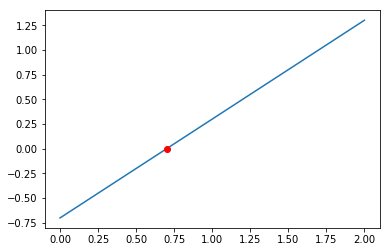

In [5]:
X = np.linspace(0,2,100)
plt.plot(X,f0(X))
plt.plot(0.7,f0(0.7),'o',color='red')

In [21]:
epsilon = 0.000001
print(dichotomie (f0 ,0. ,2. , epsilon ))
print(newton(f0,fp0,0.,epsilon))

(0.6999998092651367, 21)
(0.7, 2)


In [22]:

def f1(x):
    return x**2.-3.
def fp1(x):
    return 2.*x

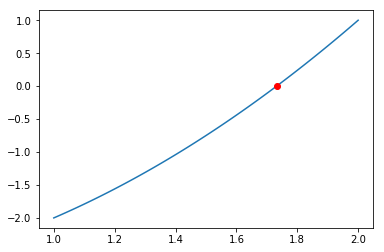

In [44]:
X = np.linspace(1,2,100)
plt.plot(X,f1(X))
plt.plot(np.sqrt(3),f1(np.sqrt(3)),'o',color='red')
#plt.plot(-np.sqrt(3),f1(-np.sqrt(3)),'o',color='red')
#plt.plot(X,0*X)


epsilon = 10.**(-9)

def fp_approx_1(x,h =0.1):
    return ( (f1 ( x + h ) - f1 ( x ) )/ h)


In [45]:



dichotomie(f1,1,2,epsilon)

(1.7320508072152734, 30)

In [46]:
newton(f1,fp1,2,epsilon)

(1.7320508075688774, 5)

In [47]:
newton(f1,fp_approx_1,2,epsilon)

(1.7320508075833512, 7)